In [1]:
import numpy as np
import pandas as pd

In [ ]:
# https://www.kaggle.com/datasets/abdelrahmankhalil/100000-uk-used-car-data-set

In [306]:
df = pd.read_csv('unzipped_archive/bmw.csv')

In [307]:
from sklearn.model_selection import train_test_split

# по умолчанию train_size = 0.75, (test = 0.25)

# по умолчанию выборки train и test получаются всегда разные при их определении, выбираются случайно

# но выборку можно захолдить, передав парамтетр random_state = 42

train, test = train_test_split(df, train_size = 0.75)

# Добавляем еще одну переменную

<Axes: >

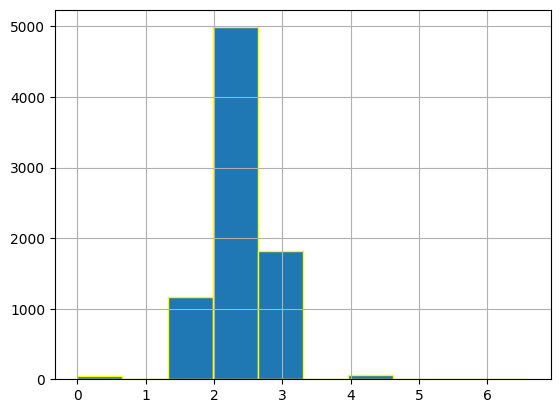

In [11]:
# например размер движка. Предположение: чем больше размер движка, тем дороже машина

# посмотрим распределение engineSize: 

train['engineSize'].hist(edgecolor = 'yellow')

<Axes: xlabel='engineSize'>

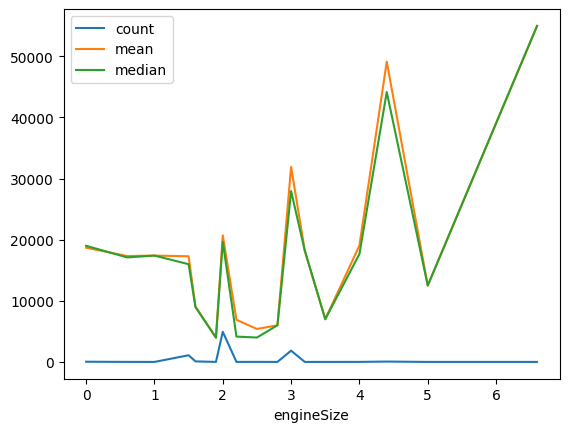

In [194]:
# посмотрим распределение agg-параметров для ['price'] относительно engineSize:

train.groupby(['engineSize'])['price'].agg(['count', 'mean', 'median']).plot()

In [195]:
# видим, что есть провалы на графике. возможно это машины с большим engineSize, но старые.

# подключим в группировку еще и год: видим старые машины на месте провалов тренда

train.groupby(['engineSize'])[['price', 'year']].agg(['count', 'mean', 'median'])

price                         year                     
           count          mean   median count         mean  median
engineSize                                                        
0.0           34  18687.735294  18999.0    34  2016.000000  2017.0
0.6            5  17328.000000  17100.0     5  2016.200000  2016.0
1.0            1  17400.000000  17400.0     1  2015.000000  2015.0
1.5         1094  17285.179159  15989.0  1094  2017.603291  2018.0
1.6           87   9061.781609   8977.0    87  2013.563218  2014.0
1.9            2   3972.500000   3972.5     2  1999.000000  1999.0
2.0         4933  20704.153051  19660.0  4933  2017.067707  2017.0
2.2            6   6897.500000   4150.0     6  2002.833333  2002.0
2.5            9   5395.777778   3990.0     9  2006.555556  2007.0
2.8            1   5995.000000   5995.0     1  1996.000000  1996.0
3.0         1843  31908.820944  27950.0  1843  2017.181769  2017.0
3.2            2  18225.000000  18225.0     2  2004.000000  2004.0
3.5            1   6990.000000   6990.0     1  2002.000000  2002.0
4.0            5  19049.000000  17650.0     5  2010.200000  2010.0
4.4           59  49123.864407  44160.0    59  2016.932203  2018.0
5.0            1  12495.000000  12495.0     1  2006.000000  2006.0
6.6            2  54975.000000  54975.0     2  2017.000000  2017.0

In [196]:
# поскольку мы добавляем новую переменную к году, то здесь мы просто смотрим чтобы оценить, 
# а для того чтобы сделать группировку по интервалам engineSize, нам достаточно просто ['price']

train.groupby(['engineSize'])['price'].agg(['count', 'mean', 'median']).reset_index()

,engineSize,count,mean,median
0,0.0,34,18687.735294,18999.0
1,0.6,5,17328.000000,17100.0
2,1.0,1,17400.000000,17400.0
3,1.5,1094,17285.179159,15989.0
4,1.6,87,9061.781609,8977.0
5,1.9,2,3972.500000,3972.5
6,2.0,4933,20704.153051,19660.0
7,2.2,6,6897.500000,4150.0
8,2.5,9,5395.777778,3990.0
9,2.8,1,5995.000000,5995.0


In [317]:
# посмотрели на группировку по engineSize для price и зададим интервалы разбиения всей train выборки:

intervals = [-1, 1.5, 2, 7]

In [318]:
# разбиваем всю выборку train на выбранные интервалы

pd.cut(train['engineSize'], intervals)

2217    (1.5, 2.0]
2039    (1.5, 2.0]
7111    (1.5, 2.0]
8982    (1.5, 2.0]
2442    (1.5, 2.0]
           ...    
5119    (1.5, 2.0]
3006    (1.5, 2.0]
7476    (1.5, 2.0]
501     (1.5, 2.0]
2711    (1.5, 2.0]
Name: engineSize, Length: 8085, dtype: category
Categories (3, interval[float64, right]): [(-1.0, 1.5] < (1.5, 2.0] < (2.0, 7.0]]

In [319]:
# группируем train выборку по выбранным интервалам:

# сначала задаем переменную разбивки - engine_group

engine_group = pd.cut(train['engineSize'], intervals, labels = ['<=1.5', '<=2', '>2'])

In [311]:
# затем делаем groupby по этой переменной разбивки, для train выборки по price

train.groupby([engine_group])['price'].agg(['count', 'mean', 'median']).reset_index()

,engineSize,count,mean,median
0,<=1.5,1122,17251.843137,15989.5
1,<=2,5023,20641.159666,19790.0
2,>2,1940,31797.648969,27500.0


In [320]:
train['engine_group'] = pd.cut(train['engineSize'], intervals, labels = ['<=1.5', '<=2', '>2'])

In [312]:
# Другой способ сделать разбивку. Не используя функцию cut:

def intervals(x):
    if x <= 1.5:
        return '<=1.5'
    if x <= 2:
        return '<=2'
    return '>2'

In [263]:
# создается новый столбец engine_group в который последователно добавляются значения (x) из engineSize с применением функции:

train['engine_group'] = train['engineSize'].apply(intervals)

In [321]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,engine_group
2217,3 Series,2016,14990,Manual,33201,Petrol,150,48.7,2.0,<=2
2039,5 Series,2020,33980,Semi-Auto,1500,Hybrid,135,156.9,2.0,<=2
7111,1 Series,2019,27995,Semi-Auto,101,Diesel,145,51.4,2.0,<=2
8982,3 Series,2017,13499,Automatic,52716,Diesel,145,70.6,2.0,<=2
2442,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,<=2
...,...,...,...,...,...,...,...,...,...,...
5119,X1,2018,23450,Automatic,18487,Diesel,145,60.1,2.0,<=2
3006,4 Series,2019,23775,Manual,8293,Diesel,145,62.8,2.0,<=2
7476,1 Series,2013,9350,Manual,56000,Diesel,30,62.8,2.0,<=2
501,2 Series,2016,17998,Semi-Auto,28099,Diesel,145,55.4,2.0,<=2


In [322]:
train.groupby(['engine_group'])['price'].agg(['count', 'mean', 'median']).reset_index()

,engine_group,count,mean,median
0,<=1.5,1122,17251.843137,15989.5
1,<=2,5023,20641.159666,19790.0
2,>2,1940,31797.648969,27500.0


In [79]:
# проверим нашу группировку на контрольную сумму:
print(t['count'].sum())
print(len(train))

8085
8085


In [210]:
# теперь на основе группировки надо сделать новую модель:

model_year_engine_median = train.groupby(['year', 'engine_group'])['price'].median().reset_index()

In [211]:
# в модели столбец price - уже не price, а прогнозный признак - его надо переименовать, чтобы он не мешался с price

model_year_engine_median.columns = ['year', 'engine_group', 'pred_price']

In [212]:
model_year_engine_median

,year,engine_group,pred_price
0,1996,>2,5995.0
1,1999,<=2,3972.5
2,2000,<=2,1699.0
3,2001,<=1.5,13000.0
4,2001,>2,4500.0
5,2002,<=2,3999.0
6,2002,>2,2990.0
7,2003,>2,9222.5
8,2004,<=2,2166.5
9,2004,>2,3990.0


In [60]:
# для того чтобы визуализировать группироки по year и по engine_group построим pivot_table:

t = train.pivot_table(index = 'year', columns = 'engine_group', values = 'price', aggfunc = 'median')
t

engine_group,<=1.5,<=2,>2
year,,,
1996,NaN,NaN,5995.0
1997,NaN,3950.0,NaN
1999,NaN,3972.5,NaN
2000,NaN,1699.0,1550.0
2001,13000.0,NaN,3050.0
2002,NaN,3999.0,2350.0
2003,NaN,NaN,3495.0
2004,NaN,2166.5,14950.0
2005,NaN,4375.0,4995.0


<Axes: xlabel='engine_group', ylabel='year'>

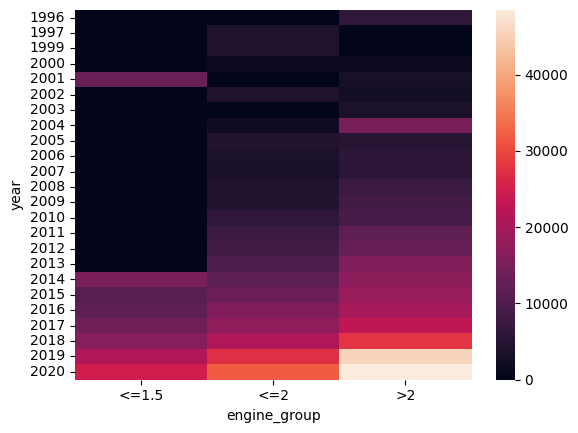

In [61]:
# визуализируем данные с помощью heatmap:

# для этого заполним пропуски в t:

t = t.fillna(0)

# и с помощью seaborn построим heatmap:

import seaborn as sns

sns.heatmap(t)

In [ ]:
# по heatmap видно (не обращая внимания на шумовые данные вверху таблицы):

# чем больше год и чем больше группа объема двигателя - тем больше цена - смещение в правый нижний угол

In [ ]:
# теперь нашу модель можно джойнить к train и test

In [62]:
train = pd.merge(train, model_year_engine_median, on = ['year', 'engine_group'], how = 'left')

In [63]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,engine_group,pred_price
0,2 Series,2019,19970,Manual,5076,Petrol,145,52.3,1.5,<=1.5,21000.0
1,1 Series,2019,26991,Semi-Auto,2343,Petrol,145,40.4,1.5,<=1.5,21000.0
2,X2,2019,26972,Automatic,123,Petrol,145,38.7,2.0,<=2,27450.0
3,1 Series,2013,8700,Manual,57542,Diesel,30,62.8,2.0,<=2,9995.0
4,2 Series,2019,19495,Manual,4824,Petrol,150,52.3,1.5,<=1.5,21000.0
...,...,...,...,...,...,...,...,...,...,...,...
8080,3 Series,2016,12990,Semi-Auto,48788,Diesel,0,74.3,2.0,<=2,15750.0
8081,3 Series,2013,12330,Semi-Auto,10050,Petrol,160,47.1,2.0,<=2,9995.0
8082,1 Series,2016,13499,Manual,40855,Diesel,30,65.7,2.0,<=2,15750.0
8083,3 Series,2016,16747,Semi-Auto,25513,Diesel,145,56.5,3.0,>2,19950.0


In [66]:
# проводим проверку на MAE & MAPE:

train['err'] = abs(train['pred_price'] - train['price'])

In [67]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,engine_group,pred_price,err
0,2 Series,2019,19970,Manual,5076,Petrol,145,52.3,1.5,<=1.5,21000.0,1030.0
1,1 Series,2019,26991,Semi-Auto,2343,Petrol,145,40.4,1.5,<=1.5,21000.0,5991.0
2,X2,2019,26972,Automatic,123,Petrol,145,38.7,2.0,<=2,27450.0,478.0
3,1 Series,2013,8700,Manual,57542,Diesel,30,62.8,2.0,<=2,9995.0,1295.0
4,2 Series,2019,19495,Manual,4824,Petrol,150,52.3,1.5,<=1.5,21000.0,1505.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8080,3 Series,2016,12990,Semi-Auto,48788,Diesel,0,74.3,2.0,<=2,15750.0,2760.0
8081,3 Series,2013,12330,Semi-Auto,10050,Petrol,160,47.1,2.0,<=2,9995.0,2335.0
8082,1 Series,2016,13499,Manual,40855,Diesel,30,65.7,2.0,<=2,15750.0,2251.0
8083,3 Series,2016,16747,Semi-Auto,25513,Diesel,145,56.5,3.0,>2,19950.0,3203.0


In [68]:
# MAE:

train['err'].mean()

3668.957204700062

In [69]:
train['err_percent'] = train['err'] / train['price']

In [70]:
# MAPE:

train['err_percent'].mean()

0.15904682895674274

In [225]:
# Проверка с автоматическим расчетом в sklearn: (работает если дропнуть nan - несколько шагов назад)

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

print(mean_absolute_error(train['price'], train['pred_price']))
print(mean_absolute_percentage_error(train['price'], train['pred_price']))

KeyError: 'pred_price'

In [73]:
# теперь проверка на test:

# сначала к test надо добавить доп.столбец по группировке engineSize

test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10439,1 Series,2016,13200,Manual,17705,Petrol,125,52.3,1.5
8083,1 Series,2018,20999,Automatic,24205,Petrol,145,39.8,3.0
5283,5 Series,2019,38995,Automatic,6500,Hybrid,135,156.9,2.0
4022,1 Series,2018,14499,Manual,19947,Petrol,145,53.3,1.5
8628,1 Series,2013,10400,Automatic,35000,Diesel,30,64.2,2.0
...,...,...,...,...,...,...,...,...,...
3508,X1,2017,23680,Semi-Auto,6147,Diesel,145,60.1,2.0
8254,3 Series,2009,5995,Manual,47125,Diesel,125,58.9,2.0
5435,2 Series,2016,17450,Semi-Auto,31473,Diesel,145,55.4,2.0
7701,5 Series,2015,12990,Automatic,61000,Diesel,30,62.8,2.0


In [77]:
intervals = [-1, 1.5, 2, 7]

In [95]:
t = pd.cut(test['engineSize'], intervals, labels = ['<=1.5', '<=2', '>2'])

In [85]:
t = test.groupby(t)['price'].agg('mean')

In [96]:
test['engine_group'] = t

In [97]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,engineSize_group,engine_group
10439,1 Series,2016,13200,Manual,17705,Petrol,125,52.3,1.5,"(-1.0, 1.5]",<=1.5
8083,1 Series,2018,20999,Automatic,24205,Petrol,145,39.8,3.0,"(2.0, 7.0]",>2
5283,5 Series,2019,38995,Automatic,6500,Hybrid,135,156.9,2.0,"(1.5, 2.0]",<=2
4022,1 Series,2018,14499,Manual,19947,Petrol,145,53.3,1.5,"(-1.0, 1.5]",<=1.5
8628,1 Series,2013,10400,Automatic,35000,Diesel,30,64.2,2.0,"(1.5, 2.0]",<=2
...,...,...,...,...,...,...,...,...,...,...,...
3508,X1,2017,23680,Semi-Auto,6147,Diesel,145,60.1,2.0,"(1.5, 2.0]",<=2
8254,3 Series,2009,5995,Manual,47125,Diesel,125,58.9,2.0,"(1.5, 2.0]",<=2
5435,2 Series,2016,17450,Semi-Auto,31473,Diesel,145,55.4,2.0,"(1.5, 2.0]",<=2
7701,5 Series,2015,12990,Automatic,61000,Diesel,30,62.8,2.0,"(1.5, 2.0]",<=2


In [98]:
test = pd.merge(test, model_year_engine_median, on = ['year', 'engine_group'])

In [104]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,engineSize_group,engine_group,pred_price,err
0,1 Series,2016,13200,Manual,17705,Petrol,125,52.3,1.5,"(-1.0, 1.5]",<=1.5,11895.0,1305.0
1,1 Series,2016,10799,Manual,37087,Diesel,0,83.1,1.5,"(-1.0, 1.5]",<=1.5,11895.0,1096.0
2,1 Series,2016,9440,Manual,71000,Diesel,0,83.1,1.5,"(-1.0, 1.5]",<=1.5,11895.0,2455.0
3,1 Series,2016,10999,Manual,35898,Diesel,0,83.1,1.5,"(-1.0, 1.5]",<=1.5,11895.0,896.0
4,1 Series,2016,10795,Manual,56800,Diesel,20,70.6,1.5,"(-1.0, 1.5]",<=1.5,11895.0,1100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2689,1 Series,2007,1500,Manual,167000,Diesel,125,57.6,2.0,"(1.5, 2.0]",<=2,3245.0,1745.0
2690,3 Series,2007,3885,Automatic,97284,Diesel,260,42.2,2.0,"(1.5, 2.0]",<=2,3245.0,640.0
2691,1 Series,2004,2495,Manual,112000,Diesel,200,49.6,2.0,"(1.5, 2.0]",<=2,2166.5,328.5
2692,Z3,2001,5950,Manual,60000,Petrol,325,30.7,2.2,"(2.0, 7.0]",>2,3050.0,2900.0


In [102]:
test['err'] = abs(test['pred_price'] - test['price'])

In [103]:
# MAE:

test['err'].mean()

3769.1341870824053

In [105]:
test['err_percent'] = test['err'] / test['price']

In [106]:
# MAPE:
test['err_percent'].mean()

0.16345584128565027

In [224]:
# Проверка с автоматическим расчетом в sklearn: (работает если дропнуть nan - несколько шагов назад)

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

print(mean_absolute_error(test['price'], test['pred_price']))
print(mean_absolute_percentage_error(test['price'], test['pred_price']))

KeyError: 'pred_price'

# Дальнейшее улучшение модели

In [111]:
# у нас еще есть параметры. посмотрим например на параметр transmission:

train.groupby('transmission')['price'].agg(['count', 'mean', 'median'])

,count,mean,median
transmission,,,
Automatic,2717,22436.794994,19499.0
Manual,1889,14639.889889,13499.0
Semi-Auto,3479,27352.258120,24995.0


In [113]:
# однако размер модели model_year_engine_median увеличится в 3 раза если добавить в нее еще и разбивку по transmission:

len(model_year_engine_median)

51

In [323]:
# вместо этого можно схлопнуть модель - сгруппировав года в которых мало значений (по одно-две машины):

model_year_engine_median

,year,engine_group,pred_price
0,1996,>2,5995.0
1,1999,<=2,3972.5
2,2000,<=2,1699.0
3,2001,<=1.5,13000.0
4,2001,>2,4500.0
5,2002,<=2,3999.0
6,2002,>2,2990.0
7,2003,>2,9222.5
8,2004,<=2,2166.5
9,2004,>2,3990.0


In [324]:
# чтобы понять какие отсечения делать - посмотрим на количество машин в каждом году:

train.groupby('year')['price'].agg('count')

year
1996       1
1997       1
1998       1
1999       2
2000       2
2001       3
2002       6
2003       2
2004       8
2005       3
2006      10
2007      14
2008      18
2009      21
2010      30
2011      37
2012      80
2013     272
2014     367
2015     681
2016    1381
2017    1308
2018     640
2019    2626
2020     571
Name: price, dtype: int64

In [325]:
# объединим в такие интервалы: 0-2010, 2010-2015, 2015 - до бесконечности: (MAE и МАРЕ получились больше чем были )
# train['year_group'] = pd.cut(train['year'], [0, 2010, 2015, float('inf')])

# нужно задать более узкие интервалы: по 2 года:
train['year_group'] = pd.cut(train['year'], [0, 2010, 2012, 2014, 2016, 2018, float('inf')])

In [326]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,engine_group,year_group
2217,3 Series,2016,14990,Manual,33201,Petrol,150,48.7,2.0,<=2,"(2014.0, 2016.0]"
2039,5 Series,2020,33980,Semi-Auto,1500,Hybrid,135,156.9,2.0,<=2,"(2018.0, inf]"
7111,1 Series,2019,27995,Semi-Auto,101,Diesel,145,51.4,2.0,<=2,"(2018.0, inf]"
8982,3 Series,2017,13499,Automatic,52716,Diesel,145,70.6,2.0,<=2,"(2016.0, 2018.0]"
2442,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,<=2,"(2018.0, inf]"
...,...,...,...,...,...,...,...,...,...,...,...
5119,X1,2018,23450,Automatic,18487,Diesel,145,60.1,2.0,<=2,"(2016.0, 2018.0]"
3006,4 Series,2019,23775,Manual,8293,Diesel,145,62.8,2.0,<=2,"(2018.0, inf]"
7476,1 Series,2013,9350,Manual,56000,Diesel,30,62.8,2.0,<=2,"(2012.0, 2014.0]"
501,2 Series,2016,17998,Semi-Auto,28099,Diesel,145,55.4,2.0,<=2,"(2014.0, 2016.0]"


In [327]:
train.groupby('year_group')['price'].agg(['count', 'median'])

,count,median
year_group,,
"(0.0, 2010.0]",122,5245.0
"(2010.0, 2012.0]",117,8500.0
"(2012.0, 2014.0]",639,11491.0
"(2014.0, 2016.0]",2062,15240.0
"(2016.0, 2018.0]",1948,19490.0
"(2018.0, inf]",3197,28990.0


In [328]:
# создаем новую модель:

model_year_group_engine_median = train.groupby(['year_group', 'engine_group'])['price'].median().reset_index()
model_year_group_engine_median

,year_group,engine_group,price
0,"(0.0, 2010.0]",<=1.5,13000.0
1,"(0.0, 2010.0]",<=2,4074.5
2,"(0.0, 2010.0]",>2,6795.0
3,"(2010.0, 2012.0]",<=1.5,NaN
4,"(2010.0, 2012.0]",<=2,7995.0
5,"(2010.0, 2012.0]",>2,12970.0
6,"(2012.0, 2014.0]",<=1.5,14495.0
7,"(2012.0, 2014.0]",<=2,10985.0
8,"(2012.0, 2014.0]",>2,16500.0
9,"(2014.0, 2016.0]",<=1.5,11600.0


In [329]:
# не забываем переименовать столбцы, что бы наша предсказанная цена не путалась с действительной ценой для каждой строки:

model_year_group_engine_median.columns = ['year_group', 'engine_group', 'pred_price']

In [330]:
# Предыдущие значения МАЕ и МАРЕ были 3769.1341870824053, 0.16345584128565027

# посмотрим на train сколько мы потеряем в качестве после сделанной группировки по годам:

train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,engine_group,year_group
2217,3 Series,2016,14990,Manual,33201,Petrol,150,48.7,2.0,<=2,"(2014.0, 2016.0]"
2039,5 Series,2020,33980,Semi-Auto,1500,Hybrid,135,156.9,2.0,<=2,"(2018.0, inf]"
7111,1 Series,2019,27995,Semi-Auto,101,Diesel,145,51.4,2.0,<=2,"(2018.0, inf]"
8982,3 Series,2017,13499,Automatic,52716,Diesel,145,70.6,2.0,<=2,"(2016.0, 2018.0]"
2442,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,<=2,"(2018.0, inf]"
...,...,...,...,...,...,...,...,...,...,...,...
5119,X1,2018,23450,Automatic,18487,Diesel,145,60.1,2.0,<=2,"(2016.0, 2018.0]"
3006,4 Series,2019,23775,Manual,8293,Diesel,145,62.8,2.0,<=2,"(2018.0, inf]"
7476,1 Series,2013,9350,Manual,56000,Diesel,30,62.8,2.0,<=2,"(2012.0, 2014.0]"
501,2 Series,2016,17998,Semi-Auto,28099,Diesel,145,55.4,2.0,<=2,"(2014.0, 2016.0]"


In [279]:
model_year_group_engine_median

,year_group,engine_group,pred_price
0,"(0.0, 2010.0]",<=1.5,13000.0
1,"(0.0, 2010.0]",<=2,4717.5
2,"(0.0, 2010.0]",>2,7990.0
3,"(2010.0, 2012.0]",<=1.5,NaN
4,"(2010.0, 2012.0]",<=2,8137.0
5,"(2010.0, 2012.0]",>2,12497.5
6,"(2012.0, 2014.0]",<=1.5,14495.0
7,"(2012.0, 2014.0]",<=2,10995.0
8,"(2012.0, 2014.0]",>2,16225.0
9,"(2014.0, 2016.0]",<=1.5,11769.0


In [280]:
# мержим модель к train

train = pd.merge(train, model_year_group_engine_median, on = ['engine_group', 'year_group'])

In [281]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,engine_group,year_group,pred_price
0,X1,2019,24550,Manual,3228,Petrol,145,51.4,1.5,<=1.5,"(2018.0, inf]",21890.0
1,1 Series,2019,20980,Manual,4092,Petrol,145,44.1,1.5,<=1.5,"(2018.0, inf]",21890.0
2,1 Series,2019,21990,Semi-Auto,1540,Diesel,145,78.5,1.5,<=1.5,"(2018.0, inf]",21890.0
3,2 Series,2019,23322,Manual,123,Petrol,145,52.3,1.5,<=1.5,"(2018.0, inf]",21890.0
4,2 Series,2019,26972,Manual,10,Petrol,145,52.3,1.5,<=1.5,"(2018.0, inf]",21890.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8080,3 Series,2007,7995,Automatic,59000,Petrol,185,42.2,2.0,<=2,"(0.0, 2010.0]",4717.5
8081,i3,2014,14182,Automatic,37161,Hybrid,0,470.8,0.0,<=1.5,"(2012.0, 2014.0]",14495.0
8082,i3,2014,14495,Automatic,34539,Hybrid,0,470.8,0.0,<=1.5,"(2012.0, 2014.0]",14495.0
8083,i8,2014,43497,Automatic,41237,Hybrid,0,134.5,1.5,<=1.5,"(2012.0, 2014.0]",14495.0


In [282]:
train['err'] = abs(train['pred_price'] - train['price'])

In [283]:
train['err'].mean()

3879.484230055659

In [284]:
train['err_percent'] = train['err'] / train['price']

In [285]:
train['err_percent'].mean()

0.1710868691574407

In [286]:
# считаем МАЕ и МАРЕ:

# Проверка с автоматическим расчетом в sklearn: (работает если дропнуть nan - несколько шагов назад)

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

print(mean_absolute_error(train['price'], train['pred_price']))
print(mean_absolute_percentage_error(train['price'], train['pred_price']))

3879.484230055659
0.1710868691574407


# Добавляем в модель еще один параметр

In [331]:
# train = train.drop(['err', 'err_percent', 'pred_price'], axis = 1)
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,engine_group,year_group
2217,3 Series,2016,14990,Manual,33201,Petrol,150,48.7,2.0,<=2,"(2014.0, 2016.0]"
2039,5 Series,2020,33980,Semi-Auto,1500,Hybrid,135,156.9,2.0,<=2,"(2018.0, inf]"
7111,1 Series,2019,27995,Semi-Auto,101,Diesel,145,51.4,2.0,<=2,"(2018.0, inf]"
8982,3 Series,2017,13499,Automatic,52716,Diesel,145,70.6,2.0,<=2,"(2016.0, 2018.0]"
2442,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,<=2,"(2018.0, inf]"
...,...,...,...,...,...,...,...,...,...,...,...
5119,X1,2018,23450,Automatic,18487,Diesel,145,60.1,2.0,<=2,"(2016.0, 2018.0]"
3006,4 Series,2019,23775,Manual,8293,Diesel,145,62.8,2.0,<=2,"(2018.0, inf]"
7476,1 Series,2013,9350,Manual,56000,Diesel,30,62.8,2.0,<=2,"(2012.0, 2014.0]"
501,2 Series,2016,17998,Semi-Auto,28099,Diesel,145,55.4,2.0,<=2,"(2014.0, 2016.0]"


In [332]:
train.groupby('transmission')['price'].agg(['count', 'mean', 'median'])

,count,mean,median
transmission,,,
Automatic,2676,22622.446188,19553.0
Manual,1886,14563.747084,13490.0
Semi-Auto,3523,27453.777746,24998.0


In [333]:
# добавляем в новую модель еще один параметр 'transmission':

model = train.groupby(['year_group', 'engine_group', 'transmission'])['price'].mean().reset_index()

In [334]:
# не забываем переименоваывать price в pred_price:

model.columns = ['year_group', 'engine_group', 'transmission', 'pred_price']

In [300]:
# значения nan возникают из-за наличия интервальной переменной year_group.
# если использовать не year_group, a просто year - nan - не будет:

train.groupby(['year', 'engine_group', 'transmission'])['price'].mean().reset_index()

,year,engine_group,transmission,price
0,1996,>2,Automatic,5995.000000
1,1999,<=2,Manual,3972.500000
2,2000,<=2,Manual,1699.000000
3,2001,<=1.5,Manual,13000.000000
4,2001,>2,Automatic,3050.000000
...,...,...,...,...
106,2020,<=2,Automatic,33428.451613
107,2020,<=2,Manual,26269.178571
108,2020,<=2,Semi-Auto,31894.032258
109,2020,>2,Automatic,47001.944444


In [299]:
#(как отображать все строки, когда надо посмотреть именно на весь датафрейм):

# pd.options.display.max_rows = 999

In [335]:
# или можно просто дропнуть nan интервалы:

model = model.dropna()

In [336]:
# сделаем проверку на train:

train = pd.merge(train, model, how = 'left', on = ['engine_group', 'year_group', 'transmission'])

In [337]:
train

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,engine_group,year_group,pred_price
0,3 Series,2016,14990,Manual,33201,Petrol,150,48.7,2.0,<=2,"(2014.0, 2016.0]",13079.687345
1,5 Series,2020,33980,Semi-Auto,1500,Hybrid,135,156.9,2.0,<=2,"(2018.0, inf]",28787.061069
2,1 Series,2019,27995,Semi-Auto,101,Diesel,145,51.4,2.0,<=2,"(2018.0, inf]",28787.061069
3,3 Series,2017,13499,Automatic,52716,Diesel,145,70.6,2.0,<=2,"(2016.0, 2018.0]",18705.479899
4,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,<=2,"(2018.0, inf]",28787.061069
...,...,...,...,...,...,...,...,...,...,...,...,...
8080,X1,2018,23450,Automatic,18487,Diesel,145,60.1,2.0,<=2,"(2016.0, 2018.0]",18705.479899
8081,4 Series,2019,23775,Manual,8293,Diesel,145,62.8,2.0,<=2,"(2018.0, inf]",24866.694268
8082,1 Series,2013,9350,Manual,56000,Diesel,30,62.8,2.0,<=2,"(2012.0, 2014.0]",9979.500000
8083,2 Series,2016,17998,Semi-Auto,28099,Diesel,145,55.4,2.0,<=2,"(2014.0, 2016.0]",17288.165079


In [340]:
train['err'] = abs(train['pred_price'] - train['price'])

In [341]:
train['err'].mean()

3782.779563674665

In [342]:
train['err_percent'] = train['err'] / train['pred_price']

In [343]:
train['err_percent'].mean()

0.16201279667839877

In [ ]:
# теперь проверяем на test и далее... далее...

In [ ]:
# Это было человеческое обучение: 
    
# Человеческое обучение: когда мы берем данные, самостоятельно их анализируем,
# строим графики, таблицы – ищем в них какие-то закономерности. 
# На основе этих закономерностей придумываем правила по которым мы определяем некоторые прогнозные значения. 
# Для автомобилей: мы научились определять цену автомобиля по году, объёму двигателя и типу трансмиссии с ошибкой в 16%.


In [ ]:
# Следующий раздел посвящен машинному обучению:

# Машинное обучение: делает ровно то же самое что и человеческое обучение. 
# Позволяет определять целевой признак, целевую переменную по фичам – признакам которые нам даны.
# Разница в том, что правила для определения прогнозных значений - 
# находятся автоматически, практически без нашего участия.

# Мы только должны правильно загрузить наши данные и проследить, 
# чтобы машина правильно обучилась. Но сам процесс поиска взаимосвязей – 
# машина делает сама – автоматически пытается найти закономерности в данных.